# PRÁCTICA FINAL: 

LUCÍA BOHÓRQUEZ Y CRISTINA RUBIALES 14 junio 2022

## MODELOS SUPERVISADOS: AIRBNB 


<u> “La Inteligencia Artificial hace referencia a cualquier método que le permita a una máquina reproducir cualquier comportamiento humano" Alber Montenegro, profesor de la Maestría en Analítica de Datos de la Universidad Central.

En esta práctica hemos escogido el dataset de AIRBNB para analizar y predecir la variable precio. Nos encontramos ante un dataset de modelos supervisados de regresion. Durante el trabajo iremos desarrollando y explicando cada paso y cada concepto para una buena ejecucion en el resultado que queremos obtener.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn import metrics
from pyexpat import model
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from category_encoders.one_hot import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

from keras import metrics
from keras import losses 
from keras import optimizers 
from keras import metrics
from keras.utils.vis_utils import plot_model

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

En machine learning como bien sabemos, existen dos tipos de aprendizaje automático, supervisado y no supervisado. El aprendizaje no supervisado parte de unos datos no etiquetados en los que no hay variables dependientes o de salida, sino que únicamente se introducen datos de entrada. Este tipo de aprendizaje se usa cuando no tenemos ningún conociemiento previo y se espera encontrar una organización de los datos de entrada que permita ordenarlos a través de relaciones que pueden estar ocultas a simple vista. Es decir, pretende descubrir patrones previamente desconocidos en los datos. Por ello posee un carácter exploratorio. Un ejemplo de aplicación de aprendizaje no supervisado, sería en marketing, para detectar tendencias de comportamiento con una base de datos de compra venta de clientes.

En esta práctica vamos a usar aprendizaje supervisado. En el aprendizaje supervisado los algoritmos trabajan con datos etiquetados y se entrena al algoritmo introduciendo unos datos de entrada y unos datos de salida que se esperan obtener a partir de los datos de entrada. De este modo, los algoritmos trabajan con datos etiquetados a partir de los cuales deduce una función que establezca una relación matemática entre ellos, desde la función obtenida con los datos de entrenamiento el algoritmo hará las predicciones con las variables de entrada que introduzcamos.

Matemáticamente el aprendizaje supervisado opera con la introducción de unas variables independientes y unas variables dependientes, que serán lo que se espera que se obtenga como datos de salida. A partir de estos datos, el algoritmo se entrena y busca una relación matemática entre los datos de entrada y de salida con el objetivo de que sea capaz de obtener unos resultados similares a los introducidos como variables dependientes, pero introduciendo exclusivamente los datos de entrada (variables dependientes).

La función puede obtener como resultado un valor numérico (en regresión, que es con lo que vamos a trabajar) o una etiqueta (en clasificación). Para entrenar al algoritmo, vamos a dividir nuestra base de datos en dos, un 70% de los datos se usarán para entrenarlo, y un 30% para testar las predicciones.

Para este tipo de problemas debemos saber que sesiempre se suele involucran una prediccion de valor numerico, mientras que en clasificacion se precie una clase. Y para anlizar las metricas en los distintos modelos se ule calcular el error en el modelo. Por tanto, en los tres modelos que vamos a analizar, realizaremos un calculo de RMSE ( error cuadratico medio) y R2 que es el porcentaje de la varizna explicada.


# 1.  ANÁLISIS EXPLORATORIO 

Lo primero de todo importamos los datos contenidos en el csv 'airbnb-listings-extract.csv'. Podemos observar que se trata de una base de datos que contiene 89 variables y 14780 filas. Al importarlo hemos sustituido los espacios de los nombres de las columnas por "_" para evitar cualquier tipo de posible error al nombrarlas. Nuestra variable objetivo en está práctica, es Price, la cual muestra precio por noche del inmueble. 


In [2]:
airbnbtot=pd.read_csv('airbnb-listings-extract.csv', lineterminator='\n', sep=';')

In [3]:
airbnbtot.columns = airbnbtot.columns.str.replace(" ","_")
airbnbtot

ID                            Listing_Url       Scrape_ID  \
0      11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1      17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2      17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3       5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4      18104606  https://www.airbnb.com/rooms/18104606  20170407214050   
...         ...                                    ...             ...   
14775   2098030   https://www.airbnb.com/rooms/2098030  20170502132028   
14776  17989442  https://www.airbnb.com/rooms/17989442  20170404145355   
14777  13278634  https://www.airbnb.com/rooms/13278634  20170404145355   
14778  10733941  https://www.airbnb.com/rooms/10733941  20160516142622   
14779   4637801   https://www.airbnb.com/rooms/4637801  20160104002432   

      Last_Scraped                                         Name  \
0       2017-03-07               The Loft-Full Bath-Deck w/View   
1       2017-04-08                   Claris I, Friendly Rentals   
2       2017-04-08          Style Terrace Red, Friendly Rentals   
3       2017-04-08            Picasso Suite 1.4 Paseo de Gracia   
4       2017-04-08               Smart City Centre Apartment II   
...            ...                                          ...   
14775   2017-05-02                        Spring into Bed Stuy!   
14776   2017-04-06  Paris 15 - Chambre cosy , near Eiffel tower   
14777   2017-04-05            Cozy Appartment Paris Batignolles   
14778   2016-05-18                City Park West Victorian Flat   
14779   2016-01-04          Sunny room near UW + buses downtown   

                                                 Summary  \
0      Loft in the Hill country 12-15 minutes directl...   
1      This apartment has: 1 double bed, 1 double sof...   
2      This apartment has: 1 double bed, 1 double sof...   
3      Live like a local in Barcelona's most chic dis...   
4      Unique apartment in vibrant neighborhoods, car...   
...                                                  ...   
14775  Sometimes I rent as a host (I'm here, guest st...   
14776  Paris- 15 -Résidence privée(code & gardien). Q...   
14777  Cozy 2 bedroom apartment in core of Batignoles...   
14778  The space is in an older Victorian home, with ...   
14779  Private room (SUNROOM IS USED FOR STORAGE AT T...   

                                                   Space  \
0      This loft has a spectacular view of the hills ...   
1      This apartment has: 1 double bed, 1 double sof...   
2      This apartment has: 1 double bed, 1 double sof...   
3      You wake up to the sun rising over Barcelona's...   
4      License: HUTB-005313 Charming apartment, locat...   
...                                                  ...   
14775  Simple, clean, modern one-bedroom in beautiful...   
14776  J'ai vécu au Canada, à Londres ,Madrid  J'ai v...   
14777  Very functional apartment in one of the most c...   
14778                                                NaN   
14779  This is a 1920's house I bought recently and i...   

                                             Description Experiences_Offered  \
0      Loft in the Hill country 12-15 minutes directl...                none   
1      This apartment has: 1 double bed, 1 double sof...                none   
2      This apartment has: 1 double bed, 1 double sof...                none   
3      Live like a local in Barcelona's most chic dis...                none   
4      Unique apartment in vibrant neighborhoods, car...                none   
...                                                  ...                 ...   
14775  Sometimes I rent as a host (I'm here, guest st...                none   
14776  Paris- 15 -Résidence privée(code & gardien). Q...                none   
14777  Very functional apartment in one of the most c...                none   
14778  The space is in an older Victorian home, with ...                none 

Para comenzar el analisis, realizamos un mapa de correlación entre las variables numéricas de nuestro dataset y podemos observar la correlación entre ellas. Además realizamos mapa de correlación en el que podemos observar la correlación de cada variable únicamente con la variable Price. Y podemos observar que las variables más correacionadas con nuestra variable objetivo son Weekly_Price, Monthly_Price, Cleaning_Fee, Accommodates, Bedrooms, Beds, Squared Feet, Security_Deposit, Bathrooms, Guests_Included, Host_Listings_Count, Extra_People, Review_Scores_Cleanliness, Review_Scores_Location, Review_Scores_Rating, entre otras. Podemos ver que variables como weekly y monthly price y cleaning fee están muy correlacionadas con la variable price, podemos ver que su correlación esta entre 1 y 0.7. 

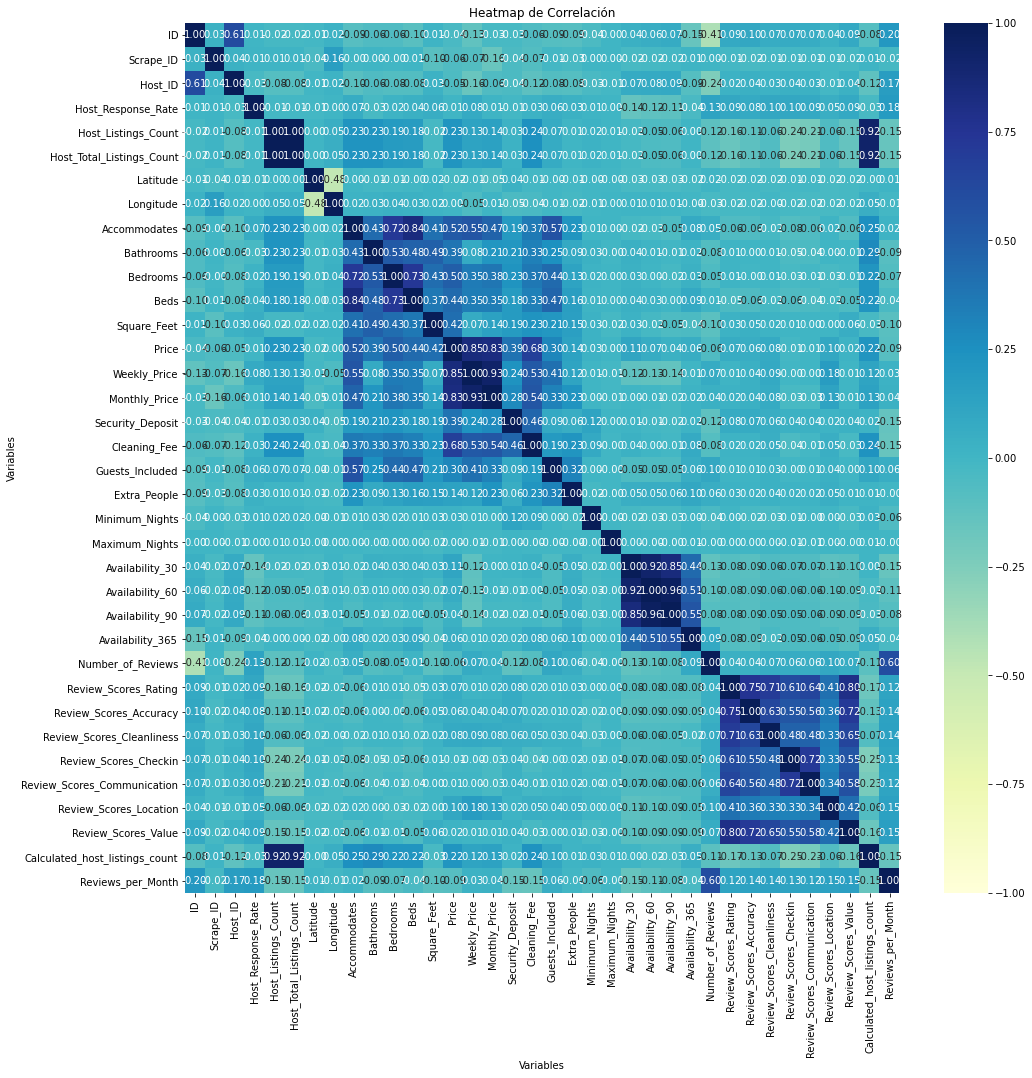

In [4]:
corrmat = airbnbtot.corr()
plt.figure(figsize=(16,16))
ax=sns.heatmap(corrmat, cmap='YlGnBu',
               annot=True,
              vmin=-1,
               vmax=1,
               center=0,fmt='.2f') 
ax.set(title='Heatmap de Correlación',
      ylabel='Variables',
      xlabel='Variables')
plt.show()

In [5]:
corrmat

ID  Scrape_ID   Host_ID  \
ID                              1.000000   0.033226  0.614647   
Scrape_ID                       0.033226   1.000000  0.038972   
Host_ID                         0.614647   0.038972  1.000000   
Host_Response_Rate              0.007693   0.008873 -0.025785   
Host_Listings_Count            -0.021960   0.010553 -0.078720   
Host_Total_Listings_Count      -0.021960   0.010553 -0.078720   
Latitude                       -0.014326  -0.038847 -0.006227   
Longitude                       0.023778   0.163784  0.019640   
Accommodates                   -0.091199  -0.001419 -0.101089   
Bathrooms                      -0.061819   0.001142 -0.060457   
Bedrooms                       -0.061015  -0.002212 -0.075638   
Beds                           -0.100912   0.007354 -0.077407   
Square_Feet                     0.008098  -0.099540  0.025136   
Price                          -0.036761  -0.056904 -0.053224   
Weekly_Price                   -0.130913  -0.071152 -0.161126   
Monthly_Price                  -0.029801  -0.159077 -0.060776   
Security_Deposit               -0.026881  -0.039188 -0.040574   
Cleaning_Fee                   -0.060199  -0.073872 -0.115430   
Guests_Included                -0.085007  -0.008401 -0.075913   
Extra_People                   -0.087504  -0.031154 -0.083141   
Minimum_Nights                 -0.043396   0.003182 -0.034260   
Maximum_Nights                  0.003149   0.002340 -0.008522   
Availability_30                 0.043156  -0.024631  0.073245   
Availability_60                 0.060412  -0.016975  0.082581   
Availability_90                 0.071540  -0.015153  0.093170   
Availability_365               -0.154990   0.011991 -0.085241   
Number_of_Reviews              -0.413010   0.004170 -0.244239   
Review_Scores_Rating            0.088090  -0.011947  0.024839   
Review_Scores_Accuracy          0.095120  -0.024282  0.041326   
Review_Scores_Cleanliness       0.066560  -0.010905  0.027619   
Review_Scores_Checkin           0.071488  -0.010398  0.039169   
Review_Scores_Communication     0.068685  -0.009519  0.031577   
Review_Scores_Location          0.038245  -0.008991 -0.011382   
Review_Scores_Value             0.087677  -0.018328  0.035665   
Calculated_host_listings_count -0.080157   0.008074 -0.120934   
Reviews_per_Month               0.197712  -0.017681  0.167138   

                                Host_Response_Rate  Host_Listings_Count  \
ID                                        0.007693            -0.021960   
Scrape_ID                                 0.008873             0.010553   
Host_ID                                  -0.025785            -0.078720   
Host_Response_Rate                        1.000000            -0.009366   
Host_Listings_Count                      -0.009366             1.000000   
Host_Total_Listings_Count                -0.009366             1.000000   
Latitude                                 -0.013486             0.001562   
Longitude                                 0.004614             0.049433   
Accommodates                              0.065820             0.227134   
Bathrooms                                -0.025834             0.234113   
Bedrooms                                  0.018151             0.186274   
Beds                                      0.039703             0.176990   
Square_Feet                               0.059674            -0.015902   
Price                                     0.006289             0.226441   
Weekly_Price                              0.079037             0.128562   
Monthly_Price                             0.012875             0.142684   
Security_Deposit                         -0.009669             0.025577   
Cleaning_Fee                              0.026055             0.243323   
Guests_Included                           0.058772             0.074573   
Extra_People                              0.032876             0.007570   
Minimum_Nights                            0.009640       

<AxesSubplot:>

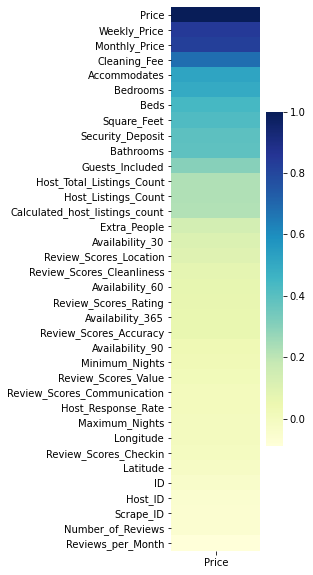

In [6]:
corr = airbnbtot.corr().loc[['Price']].sort_values('Price',ascending=False)
corr = corr.T.sort_values('Price',ascending=False)
plt.subplots(figsize=(2,10))
sns.heatmap(corr, cmap="YlGnBu")

Además, observamos las variables cualitativas, es decir, tipo object por otro lado ya que en los mapas de correlación estas no aparecen. Tras observarlas hemos decidido incluir en nuestro nuevo dataset City, Country, Property_Type y Room_Type. En cuanto a las variables númericas hemos seleccionado las variables más correlacionadas con nuestra variable objetivo, sin que esten muy correlacionadas entre ellas y hemos añadido alguna más que hemos considerado importantes. Hemos decidido no incluir Square_Feet ya que no aportaba mucha información porque contenia 14182 por lo que casi todo el dataset está compuesto por NA, y aunque los tratemos creemos que no nos aporta mucha información. 

In [7]:
airbnbtot.select_dtypes(include=['object']).describe()

Listing_Url Last_Scraped  \
count                                  14780        14780   
unique                                 14780           37   
top     https://www.airbnb.com/rooms/3057923   2017-04-08   
freq                                       1        13627   

                                      Name  \
count                                14779   
unique                               14375   
top     Apartamento en el centro de Madrid   
freq                                    12   

                                                  Summary  \
count                                               14189   
unique                                              13289   
top     Unique apartment in vibrant neighborhoods, car...   
freq                                                   64   

                                                    Space  \
count                                               10888   
unique                                              10174   
top     Los Apartamentos Good Stay Prado se encuentran...   
freq                                                   29   

                                              Description Experiences_Offered  \
count                                               14774               14780   
unique                                              14281                   5   
top     Es un piso con 6 habitaciones de las que 5  ha...                none   
freq                                                   19               14763   

                                    Neighborhood_Overview  \
count                                                9134   
unique                                               7912   
top     Se trata de una de las zonas más emblemáticas ...   
freq                                                   32   

                                                    Notes  \
count                                                5644   
unique                                               4652   
top     Check in time is at 3pm or later, although som...   
freq                                                   53   

                                                  Transit  ...  \
count                                                9066  ...   
unique                                               7839  ...   
top     It is calm, quite zone and you don’t have to s...  ...   
freq                                                   41  ...   

       Calendar_Updated Has_Availability Calendar_last_Scraped First_Review  \
count             14780               12                 14780        11618   
unique               57                1                    38         1679   
top               today                t            2017-04-08   2016-10-09   
freq               3924               12                  9946           65   

       Last_Review                    License Jurisdiction_Names  \
count        11617                        349                227   
unique         785                        316                 12   
top     2017-04-02  City registration pending              Paris   
freq           752                         15                108   

       Cancellation_Policy                   Geolocation  \
count                14780                         14780   
unique                   8                         14780   
top                 strict  40.4165085411,-3.69679268033   
freq                  5742                             1   

                                               Features\r  
count                                               14780  
unique                                                 89  
top     Host Has Profile Pic,Host Identity Verified,Is...  
freq                                                 2508  

[4 rows x 53 columns]

In [8]:
airbnb=airbnbtot[['City','Country','Property_Type','Room_Type', 'Accommodates', 'Bathrooms', 
        'Bedrooms','Beds', 'Price', 'Guests_Included', 
        'Minimum_Nights','Maximum_Nights','Number_of_Reviews', 'Extra_People', 'Reviews_per_Month', 'Review_Scores_Cleanliness', 'Review_Scores_Location',
        'Review_Scores_Rating','Host_Listings_Count','Cleaning_Fee','Security_Deposit','Weekly_Price','Monthly_Price']]

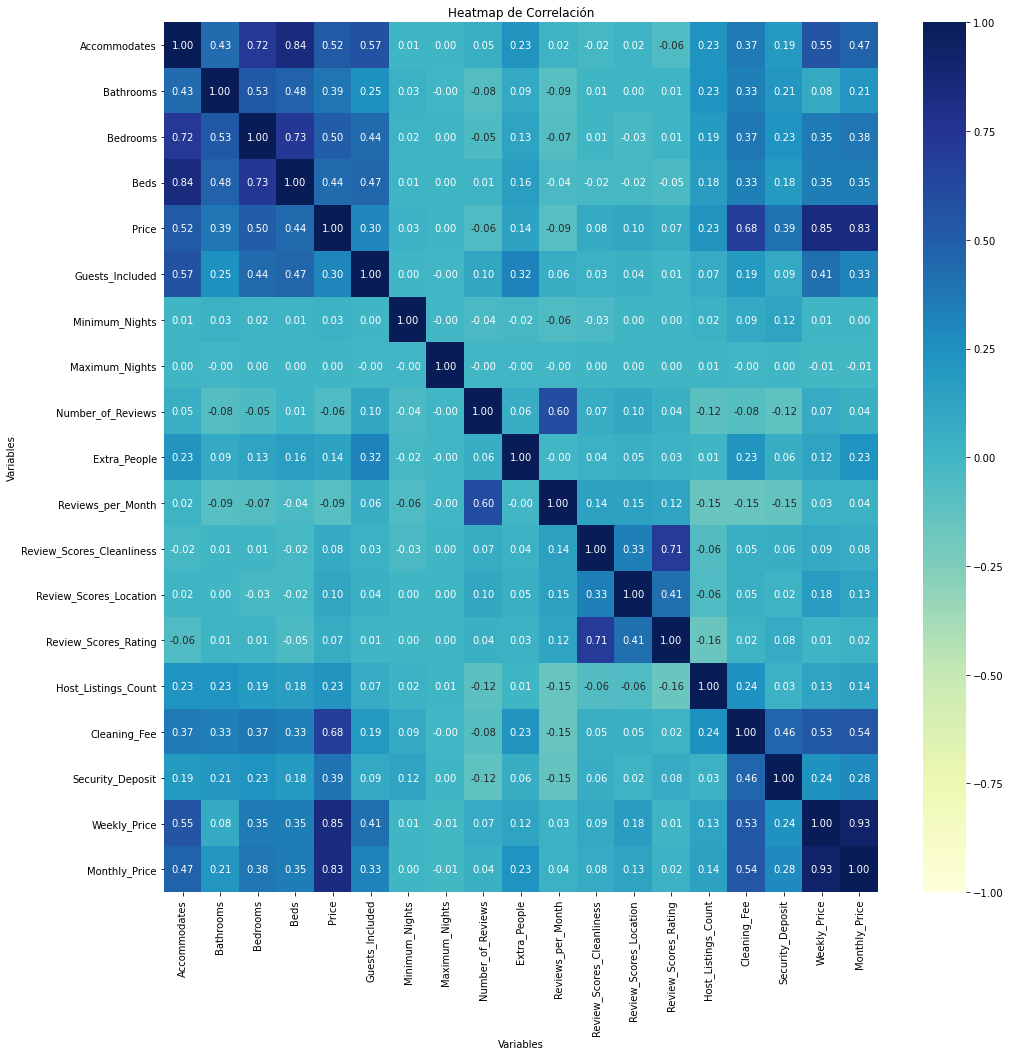

In [9]:
corrmat = airbnb.corr()
plt.figure(figsize=(16,16))
ax=sns.heatmap(corrmat, cmap='YlGnBu',
               annot=True,
              vmin=-1,
               vmax=1,
               center=0,fmt='.2f') 
ax.set(title='Heatmap de Correlación',
      ylabel='Variables',
      xlabel='Variables')
plt.show()

In [10]:
corr = airbnb.corr().loc[['Price']].sort_values('Price',ascending=False)
corr = corr.T.sort_values('Price',ascending=False)

<AxesSubplot:>

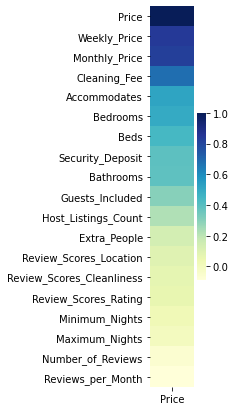

In [11]:
plt.subplots(figsize=(1,7))
sns.heatmap(corr, cmap="YlGnBu")

Mediante la función airbnb.dtypes podemos obtener los distintos tipos de datos que tenemos. En primer lugar, nos aparecen las categóricas a las que python se refiere como object. Estas son City, Country, Property_Type y Room_Type. Al contrario que las númericas, las variables categóricas devuelven un texto de la categoría a la que pertenece una determinada observación. Sin embargo, en nuestro dataset mandan las variables númericas. Estas, a su vez, se dividen en integers (int64 en python) y en floats (float64 en python). Las variables integers son aquellas que solo pueden tomar valores enteros. Por ejemplo, Guests_Included es integer ya que no puede tomar valores con decimales (no puede existir media persona, o hay guest o no lo hay). Por el contrario, las variables float son aquellas que sí que pueden tomar decimales, como sería el caso de Price. El precio de un determinado Airbnb aparece casi siempre con los céntimos siguiendo a los euros. Dentro de las númericas, destacan las variables float en nuestro dataset. 

In [12]:
airbnb.dtypes

City                          object
Country                       object
Property_Type                 object
Room_Type                     object
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Price                        float64
Guests_Included                int64
Minimum_Nights                 int64
Maximum_Nights                 int64
Number_of_Reviews              int64
Extra_People                   int64
Reviews_per_Month            float64
Review_Scores_Cleanliness    float64
Review_Scores_Location       float64
Review_Scores_Rating         float64
Host_Listings_Count          float64
Cleaning_Fee                 float64
Security_Deposit             float64
Weekly_Price                 float64
Monthly_Price                float64
dtype: object

Con la función que utilizamos a continuación (missing_summary), obtenemos un resúmen de las variables junto al número de veces totales que aparecen, sus missing values y el porcentaje de missing_rate que hay para cada una. Como podemos ver, las variables categóricas tienen un missing rate bajo, teniendo menos de 10 missing values cada una. Por otro lado, es interesante observar que las variables númericas enteras (integer) no tienen ningún missing value. En cambio, las variables numéricas float son las que más missing values tienen, siendo, en algunos casos muy superior el número de missing values al total. 
La importancia de estos missing values se puede analizar de mejor manera con el porcentaje que aparece en la tercera columna. Como ya hemos comentado anteriormente, el porcentaje aparece de dividir los missing values entre el total. Para las variables categóricas (object), el porcentaje es muy bajo. Para las variables numéricas integer es nulo, ya que no existe ningún missing value. En cambio, para las variables númericas float, el porcentaje es muy variable, siendo extremadamente alto para algunas variables. Es de destacar, que en las variables Security_Deposit, Weekly_Price y Monthly_Price, los missing values triplican al total para dos de ellas y se situan por encima del 100% para otra. Esto quiere decir, que para esa variable, hay más incógnitas que verdaderos números. Hemos decidido no eliminar Weekly y Monthly price a pesar del gran número de valores nulos ya que son las variables más correlacionadas con la variable precio que hemos visto previamente. 

In [13]:
def missing_summary(airbnb):
    num_elementos = airbnb.count()
    num_missing = airbnb.isna().sum()
    missing_summary = pd.DataFrame(index=num_elementos.index, 
                               data ={'total':num_elementos, 
                                     'missing':num_missing,
                                     'missing_rate (%)': round(num_missing/num_elementos * 100, 2)})
    return missing_summary
missing_summary(airbnb)

total  missing  missing_rate (%)
City                       14774        6              0.04
Country                    14779        1              0.01
Property_Type              14780        0              0.00
Room_Type                  14780        0              0.00
Accommodates               14780        0              0.00
Bathrooms                  14725       55              0.37
Bedrooms                   14755       25              0.17
Beds                       14731       49              0.33
Price                      14763       17              0.12
Guests_Included            14780        0              0.00
Minimum_Nights             14780        0              0.00
Maximum_Nights             14780        0              0.00
Number_of_Reviews          14780        0              0.00
Extra_People               14780        0              0.00
Reviews_per_Month          11618     3162             27.22
Review_Scores_Cleanliness  11460     3320             28.97
Review_Scores_Location     11440     3340             29.20
Review_Scores_Rating       11476     3304             28.79
Host_Listings_Count        14777        3              0.02
Cleaning_Fee                8687     6093             70.14
Security_Deposit            6256     8524            136.25
Weekly_Price                3590    11190            311.70
Monthly_Price               3561    11219            315.05

La distribución de la varible Precio, al ser nuestra varible objetivo, la realizamos de manera separada. La varible Precio no es ni precio al mes ni precio a la semana, como habíamos visto antes, sino que se trata del precio al día. Como podemos observar en la distribución, la mayoría de precios se encuentran entre 0 y 200 euros al día. Destacan los precios por debajo de 100, siendo los que más frecuencia tienen en la aplicación Airbnb. Por encima de 200 euros no hay casi frecuencias. Esto quiere decir que si se colocan por encima de esta cantidad deben ser Aibnbs con características muy especiales y únicas. 

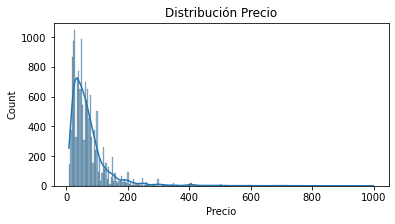

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=airbnb, x='Price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('Precio');

Con la utilización de esta fórmula, obtenemos la distribución de las variables númericas de nuestro dataset, tanto las variables float como las integer. Empezando por las variables númericas enteras (integer), la variable Accommodates representa el número de huéspedes que hay en el Airbnb. Como podemos observar, el total de huéspedes suele ser 2, seguido por 4. Es interesante observar que los números pares son los más repetidos en la distribución (hay más de 4 que de 3, por ejemplo). Pasando a la variable Guests_Included, vemos como el número más repetido es el de 1 huésped incluido en la reserva. Seguido por 2 como número más repetido en la distribución, parece ser que se suele incluir solo a 1 en la misma. En tercer lugar, analizamos la variable integer Minimun_Nights. Tiene sentido el resultado obtenido en la gráfica, ya que, es una línea constante en el valor 0 para casi todos los valores y solo se eleva al principio en 1. Esto quiere decir, que como es obvio, no se puede reservar un Airbnb menos de una noche. Siguiendo con el Number_of_Reviews, podemos ver como el 0 es el número más repetido, seguido de los cercanos a él pero con menos frecuencia. Las reviews recibidas en Airbnb son pocas, según lo ilustrado en la gráfica. Por último, para la variable Extra_People, los valores destacado vuelven a ser los cercanos a 0, entre este y el valor 5 podríamos decir. 

Pasando a las varibles númericas, estas nos dan valores mucho más estirados a lo largo del gráfico. Analizamos ambas variables, Bathrooms y Bedrooms, vemos como están cercanos a los valores 2 o 1. Ocurre algo parecido con las varibles Reviews_per_Month, Review_Scores_Cleanliness y Review_Scores_Location, ya que ninguna de ellas toma valores muy altos y se mantienen cercanos a 10.
Para la variable Review_Scores_Rating vemos como la mayoría de aquellos que han valorado el Airbnb han dado notas por encima del 80%, destacando muchos 100%. La variable más interesante que podemos analizar en este caso, es la relativa a un pago adicional por limpieza. Esta varible, Cleaning_Fee, tiene una frecuencia alta cercana al valor 50. Esto quiere decir, que es muy frecuente que se paguen fees por limpieza cuando se está usando Airbnb. Ocurre algo parecido con el depósito de seguridad. La variable Security_Deposit toma valores relativamente altos, siendo frecuente que se pague un depósito de seguridad cercano a los 100 euros. Por último, lo más importante, el precio. Son las dos varibles con más diferencia entre sus observaciones son Monthly_Price y Weekly_Price. Esto quiere decir que debido a la amplia oferta que hay en Airbnb, el precio es muy variado según el Airbnb que reserves. 

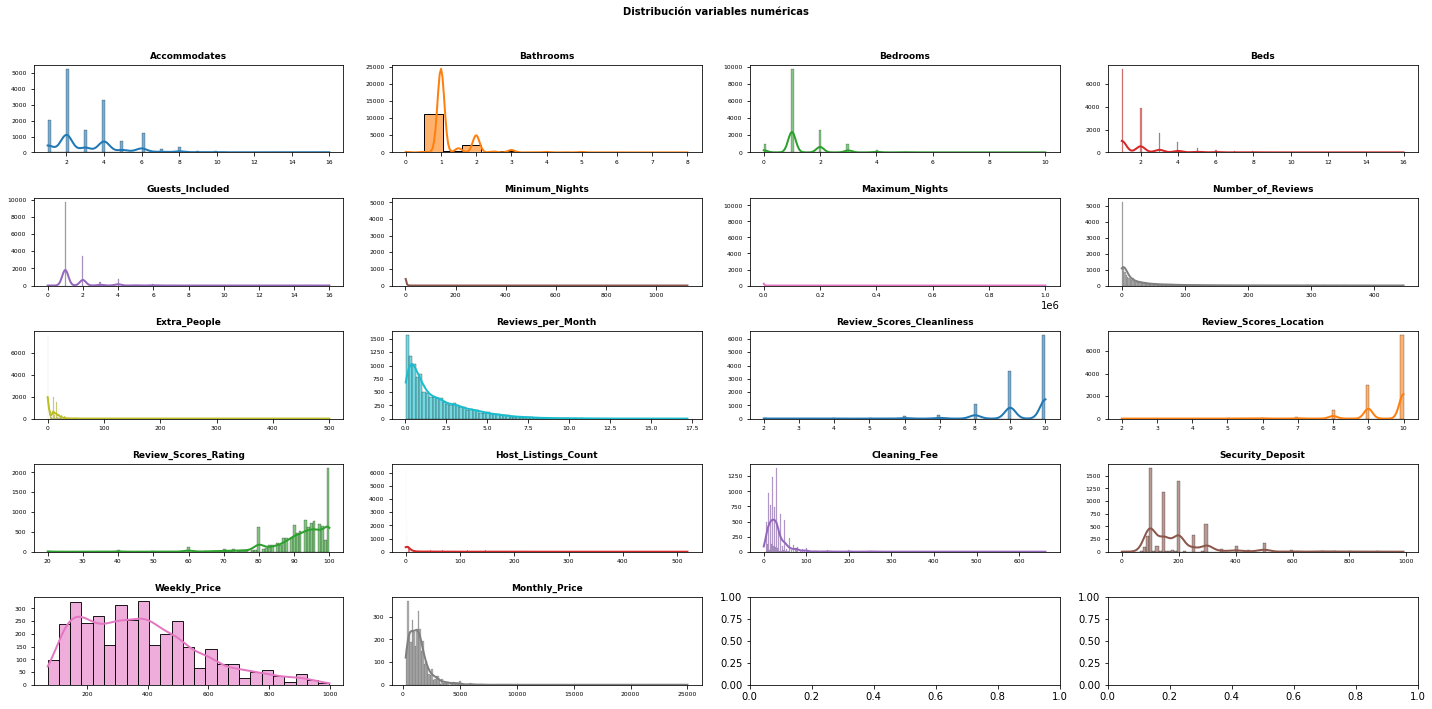

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 10))
axes = axes.flat
columnas_numeric = airbnb.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = airbnb,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.6,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Tras ver la distribución de las varibles númericas, vamos a eliminar los N/As. Esta eliminación la realizamos en las varibles númericas mediante la sustitución de los mismos por la media de la varible. Es decir, ya que no tenemos ese valor en nuestro dataset, para no alterar el mismo e inventarnos un valor muy alto o muy bajo, lo que hacemos es introducir la media de la varible, produciendo poco efecto en la distribución de la misma. No obstante, hay ciertas variables para las que no hacemos esto, ya que es consideramos más lógico poner un 0 en vez de la media. Esto es lo que ocurre para las variables Cleaning_Fee, Extra_People y Security_Deposit. En este caso, si no hay valor para las mismas, es mejor intuir que es un 0 que decir que el valor que le correspondería es la media. Porque creemos que al haber un missing value se puede interpretar que el arrendador del airbnb no cobra tasas de limpieza, no  se puede meter a gente extra o no se tiene que pagar un deposito. 

In [16]:
meanBathrooms=airbnb['Bathrooms'].mean()
airbnb['Bathrooms'] = airbnb['Bathrooms'].fillna(meanBathrooms)
meanBedrooms=airbnb['Bedrooms'].mean()
airbnb['Bedrooms'] = airbnb['Bedrooms'].fillna(meanBedrooms)
meanBeds=airbnb['Beds'].mean()
airbnb['Beds'] = airbnb['Beds'].fillna(meanBeds)
meanPrice=airbnb['Price'].mean()
airbnb['Price'] = airbnb['Price'].fillna(meanPrice)
meanrate=airbnb['Review_Scores_Rating'].mean()
airbnb['Review_Scores_Rating'] = airbnb['Review_Scores_Rating'].fillna(meanrate)
meanlisthost=airbnb['Host_Listings_Count'].mean()
airbnb['Host_Listings_Count'] = airbnb['Host_Listings_Count'].fillna(meanlisthost)
airbnb['Cleaning_Fee'] = airbnb['Cleaning_Fee'].fillna(0)
airbnb['Extra_People'] = airbnb['Extra_People'].fillna(0)
airbnb['Security_Deposit'] = airbnb['Security_Deposit'].fillna(0)
meanweeklyprice=airbnb['Weekly_Price'].mean()
airbnb['Weekly_Price'] = airbnb['Weekly_Price'].fillna(meanweeklyprice)
meanmonthlyprice=airbnb['Monthly_Price'].mean()
airbnb['Monthly_Price'] = airbnb['Monthly_Price'].fillna(meanmonthlyprice)
meanreviewsmonth=airbnb['Reviews_per_Month'].mean()
airbnb['Reviews_per_Month'] = airbnb['Reviews_per_Month'].fillna(meanreviewsmonth)
meanreviewsloc=airbnb['Review_Scores_Location'].mean()
airbnb['Review_Scores_Location'] = airbnb['Review_Scores_Location'].fillna(meanreviewsloc)
meanreviewsclean=airbnb['Review_Scores_Cleanliness'].mean()
airbnb['Review_Scores_Cleanliness'] = airbnb['Review_Scores_Cleanliness'].fillna(meanreviewsclean)

A continuación representaremos la distribución de las variables cualitativas. En primer lugar hemos representado la gráfica de los lugares donde opera Airbnb, saliendonos Madrid como el destino donde hay más frecuencia de reservas de Airbnb. Seguido por Barcelona, Londres y París, Madrid es sin ninguna discusión en este caso el lugar donde hay más Airbnb's. 

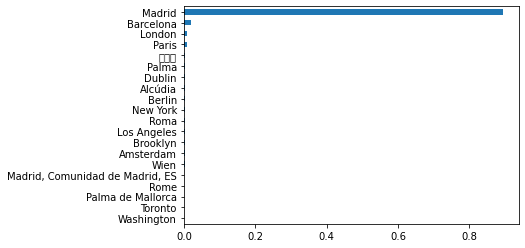

In [17]:
def distribucion_variable_categorica(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('City')

Debido a lo obtenido en el gráfico anterior, hemos decidido filtrar por Madrid y obtener únicamente los datos relativos a esa zona geográfica, ya que representan cerca del 100% de los datos. 

In [18]:
airbnb = airbnb.loc[airbnb.City == 'Madrid']
airbnb = airbnb.drop(columns ='City')

Al haber cogido Madrid como filtro, no tiene sentido poner la variable Country en nuestro dataset. Obviamente todas las observaciones van a estar incluidas en el Country Spain. Por ello, eliminamos Country de nuestro dataset. 

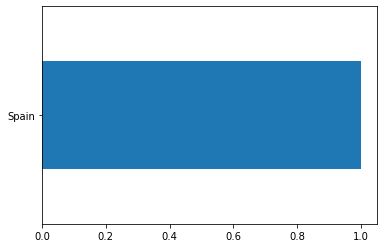

In [19]:
def distribucion_variable_categorica(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('Country')

In [20]:
airbnb = airbnb.drop(columns ='Country')

Tras utilizar la función group by por Property_Type, hacemos una división por tipo de propiedad teniendo en cuenta los distintos precios que hay para cada uno. Como podemos ver, la categoría Apartment es la que mayor diferencia tiene entre sus precios. Hay, exactamente, 10888 precios distintos para esta categoría. Esto quiere decir que habrá muchos apartamentos en diferentes zonas y con diferentes características que harán que los precios sean tan variados. A esta le siguen las variables House, Condominum, Bed & Breakfast y Loft. Aquellos Airbnbs que incluyen estas características tienen precios variados entre sí, habiendo un rango más amplio que para el resto de categorías. 

In [21]:
propairbnb = airbnb.groupby('Property_Type')
propairbnb.agg('count').Price

Property_Type
Apartment             10888
Bed & Breakfast         337
Boat                      1
Boutique hotel            6
Bungalow                  1
Camper/RV                 2
Casa particular           3
Chalet                   24
Condominium             345
Dorm                     43
Earth House               3
Guest suite               3
Guesthouse               39
Hostel                   16
House                   966
Loft                    283
Other                   220
Serviced apartment       13
Tent                      1
Timeshare                 1
Townhouse                 8
Villa                     4
Name: Price, dtype: int64

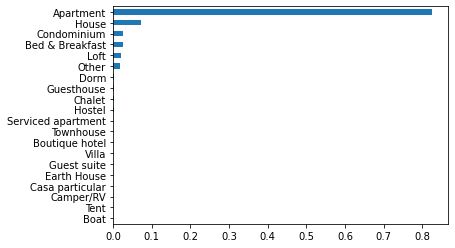

In [22]:
def distribucion_variable_categorica(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('Property_Type')

Igual que hemos hecho anteriormente, hacemos lo mismo pero esta vez con el tipo de habitación. Como podemos observar hay muchas menos categorías para esta variable. Las categorías en las que el precio es más variado serán Entire home/apt y Private room. En ambas categorías encontramos precios muy variados, por encima de 5000 precios distintos. En cambio, para un cuarto compartido (shared room) los precios son más homogéneos. Hay menos variedad entre los mismos. Aquí se podría intuir que al ser un cuarto compartido, no importan tanto las características como la localización del airbnb ya que el inquilo está cmpartiendo un cuarto con otra persona.

In [23]:
roomairbnb = airbnb.groupby('Room_Type')
roomairbnb.agg('count').Price

Room_Type
Entire home/apt    7903
Private room       5113
Shared room         191
Name: Price, dtype: int64

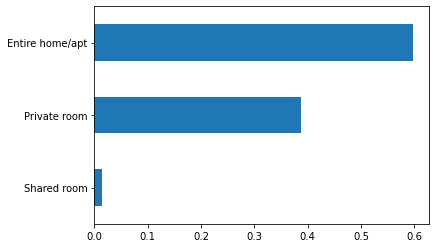

In [24]:
def distribucion_variable_categorica(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
distribucion_variable_categorica('Room_Type')

A continuación, introducimos las variables de tipo object, es decir, las variables cualitativas. Podemos observar que solamente tenemos dos, ya que previamente eliminamos las variables Country y City de nuestro dataset.

In [25]:
cat_features = (airbnb.dtypes[airbnb.dtypes=='object']
                .index.to_list())
cat_features 

['Property_Type', 'Room_Type']

One Hot Encoding es una funcion de procesamiento de datos aplicado a datos categóricos, para convertirlos en una representación vectorial binaria para su uso en algoritmos de machine learning.

Uno de los principales problemas del machine learning es que muchos algoritmos no pueden trabajar directamente con datos categóricos. Los datos categóricos son variables que pueden tomar uno de un número finito de valores posibles y se tratan de variables cualitativas.

In [27]:
coder=OneHotEncoder()

In [28]:
coder.fit(airbnb[cat_features])

OneHotEncoder(cols=['Property_Type', 'Room_Type'])

In [29]:
coder.fit(airbnb[cat_features])

OneHotEncoder(cols=['Property_Type', 'Room_Type'])

En el siguiente paso, lo que hacemos es unir a traves de join los dos dataframes: el que hemos transformado con las variables categoricas con el dataframe original. Es necesario este paso para que podamos analizar los datos y tambien podamos normalizarlos.

In [30]:
coder.transform(airbnb[cat_features])
 
encoder_df = pd.DataFrame(coder.transform(airbnb[cat_features]))

final_df = airbnb.join(encoder_df)
final_df

Property_Type        Room_Type  Accommodates  Bathrooms  Bedrooms  Beds  \
40        Apartment     Private room             2        2.0       1.0   1.0   
41        Apartment  Entire home/apt             2        1.0       0.0   1.0   
42        Apartment  Entire home/apt             3        1.0       0.0   2.0   
43        Apartment     Private room             1        1.0       1.0   1.0   
44        Apartment  Entire home/apt             6        1.0       2.0   3.0   
...             ...              ...           ...        ...       ...   ...   
14753     Apartment     Private room             2        1.0       1.0   1.0   
14754     Apartment  Entire home/apt             2        1.0       1.0   1.0   
14755   Condominium     Private room             7        1.0       2.0   5.0   
14756     Apartment  Entire home/apt             6        1.0       3.0   4.0   
14757     Apartment     Private room             1        1.0       1.0   1.0   

       Price  Guests_Included  Minimum_Nights  Maximum_Nights  ...  \
40      28.0                1               1            1125  ...   
41      58.0                1               2            1125  ...   
42      70.0                2               2            1125  ...   
43      26.0                1               7            1125  ...   
44      70.0                1               2            1125  ...   
...      ...              ...             ...             ...  ...   
14753   16.0                1               1            1125  ...   
14754   35.0                1               2              15  ...   
14755   25.0                2               1            1125  ...   
14756   50.0                3               3            1125  ...   
14757   16.0                1               1              30  ...   

       Property_Type_16  Property_Type_17  Property_Type_18  Property_Type_19  \
40                    0                 0                 0                 0   
41                    0                 0                 0                 0   
42                    0                 0                 0                 0   
43                    0                 0                 0                 0   
44                    0                 0                 0                 0   
...                 ...               ...               ...               ...   
14753                 0                 0                 0                 0   
14754                 0                 0                 0                 0   
14755                 0                 0                 0                 0   
14756                 0                 0                 0                 0   
14757                 0                 0                 0                 0   

       Property_Type_20  Property_Type_21  Property_Type_22  Room_Type_1  \
40                    0                 0                 0            1   
41                    0                 0                 0            0   
42                    0                 0                 0            0   
43                    0                 0                 0            1   
44                    0                 0                 0            0   
...                 ...               ...               ...          ...   
14753                 0                 0                 0            1   
14754                 0                 0                 0            0   
14755                 0                 0                 0            1   
14756                 0                 0                 0            0   
14757                 0                 0                 0            1   

       Room_Type_2  Room_Type_3  
40               0            0  
41               1            0  
42               1            0  
43               0            0  
44               1            0  
...            ...          ...  
14753            0            0  
14754            1            0  


El siguiente paso a ejecutar despues de OneHotEncoder es eliminar las variables categoricas, ya que no permitirian utilizar la funcion de StandardScaler, siendo esta funcion muy útil para normalizar. Y ya no las necesitamos ya que las hemos transformado en variables númericas, por lo que nos podemos deshacer de las dos variables originales, es decir, del tipo de propiedad y el tipo de habitación.

In [31]:
final_df=final_df.drop(columns=['Property_Type','Room_Type'])

In [32]:
scaler = StandardScaler()
final_scaler = scaler.fit(final_df)

data_final_norm = pd.DataFrame(index=final_df.index, columns=final_df.columns, data=final_scaler.transform(final_df))
data_final_norm

Accommodates  Bathrooms  Bedrooms      Beds     Price  Guests_Included  \
40        -0.598133   1.248244 -0.356452 -0.653739 -0.677468        -0.530553   
41        -0.598133  -0.422416 -1.566986 -0.653739 -0.141636        -0.530553   
42        -0.095937  -0.422416 -1.566986  0.009126  0.072697         0.392637   
43        -1.100329  -0.422416 -0.356452 -0.653739 -0.713190        -0.530553   
44         1.410651  -0.422416  0.854083  0.671991  0.072697        -0.530553   
...             ...        ...       ...       ...       ...              ...   
14753     -0.598133  -0.422416 -0.356452 -0.653739 -0.891801        -0.530553   
14754     -0.598133  -0.422416 -0.356452 -0.653739 -0.552441        -0.530553   
14755      1.912847  -0.422416  0.854083  1.997721 -0.731051         0.392637   
14756      1.410651  -0.422416  2.064617  1.334856 -0.284525         1.315828   
14757     -1.100329  -0.422416 -0.356452 -0.653739 -0.891801        -0.530553   

       Minimum_Nights  Maximum_Nights  Number_of_Reviews  Extra_People  ...  \
40          -0.156948        0.018607           3.842545     -0.224001  ...   
41          -0.079350        0.018607           0.750349     -0.688701  ...   
42          -0.079350        0.018607           0.334592      0.705401  ...   
43           0.308644        0.018607          -0.211090     -0.688701  ...   
44          -0.079350        0.018607          -0.600862      0.240700  ...   
...               ...             ...                ...           ...  ...   
14753       -0.156948        0.018607           1.218076     -0.688701  ...   
14754       -0.079350       -0.105753          -0.289044     -0.688701  ...   
14755       -0.156948        0.018607          -0.574877      0.240700  ...   
14756       -0.001751        0.018607          -0.107150     -0.038120  ...   
14757       -0.156948       -0.104073          -0.341014     -0.688701  ...   

       Property_Type_16  Property_Type_17  Property_Type_18  Property_Type_19  \
40            -0.017406         -0.021319         -0.015073         -0.015073   
41            -0.017406         -0.021319         -0.015073         -0.015073   
42            -0.017406         -0.021319         -0.015073         -0.015073   
43            -0.017406         -0.021319         -0.015073         -0.015073   
44            -0.017406         -0.021319         -0.015073         -0.015073   
...                 ...               ...               ...               ...   
14753         -0.017406         -0.021319         -0.015073         -0.015073   
14754         -0.017406         -0.021319         -0.015073         -0.015073   
14755         -0.017406         -0.021319         -0.015073         -0.015073   
14756         -0.017406         -0.021319         -0.015073         -0.015073   
14757         -0.017406         -0.021319         -0.015073         -0.015073   

       Property_Type_20  Property_Type_21  Property_Type_22  Room_Type_1  \
40            -0.008702         -0.008702         -0.015073     1.258183   
41            -0.008702         -0.008702         -0.015073    -0.794797   
42            -0.008702         -0.008702         -0.015073    -0.794797   
43            -0.008702         -0.008702         -0.015073     1.258183   
44            -0.008702         -0.008702         -0.015073    -0.794797   
...                 ...               ...               ...          ...   
14753         -0.008702         -0.008702         -0.015073     1.258183   
14754         -0.008702         -0.008702         -0.015073    -0.794797   
14755         -0.008702         -0.008702         -0.015073     1.258183   
14756         -0.008702         -0.008702         -0.015073    -0.794797   
14757         -0.008702         -0.008702         -0.015073     1.258183   

       Room_Type_2  Room_Type_3  
40       -1.220659    -0.121137  
41        0.819230    -0.121137  
42        0.819230    -0.121137  
43       -1.220659    -0.121137  
44        0.819230    -0.1211

En este paso, vamos a dividir nuestro dataset ya normalizado en dos. La X que es todos los datos pero excluyendo la variable predictora, Price. En cambio, la Y, se forma con el conjunto de datos de la variable objetivo que queremos estudiar, es decir, únicamente incluye la variable Price normalizada.

In [33]:
X = data_final_norm.drop(columns=['Price'])
y = data_final_norm['Price']

Es importante observar las dimensiones de nuestro dataset, antes de realizar el PCA (Principal Component Analysis). Ya que el número de compoenentes de este será igual al número de columnas de nuestra base de datos.

In [34]:
X.shape

(13207, 43)

- REDUCIR DIMENSIONES

Para este conjunto de datos, consideramos necesario realizar una reduccion de dimensiones a nuestro conjunto de datos. para ello, realizaremos un PCA, siendo este, un metodo que nos ayudara a reducir los errores que puedan existir en nuestro modelo. 

In [35]:
pca = PCA(43, random_state=1000, whiten=False)
dataPCA = pca.fit_transform(X)

xs= [i[0] for i in dataPCA]
ys= [i[1] for i in dataPCA]

<Figure size 800x800 with 0 Axes>

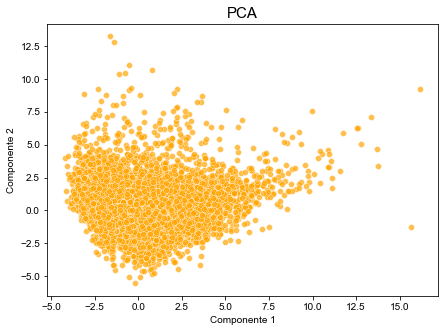

<Figure size 800x800 with 0 Axes>

In [36]:
plt.subplots(figsize=(7,5))
sns.scatterplot(x=xs, y=ys,color='orange',alpha=0.7)
plt.xlabel("Componente 1", fontsize = 10)
plt.ylabel("Componente 2", fontsize = 10)
plt.title('PCA', fontsize = 15)
sns.set(rc={"figure.figsize":(8, 4)}) 
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

PCA es Principal component analisis, como ya hemos estudiado en otros cursos, PCA nos ayuda a encontrar la combinacion de las caracteristicas de manera lineal y que aportan mas variabilidad a nuestros modleos.

Con el grafico que mostramos queremos reflejar el componente principal 1 y 2, estos explican la mayor variabilidad, es decir, la mayor parte de la varianza. Para explicalo mejor, los eigenvectors de una matriz son los vectores que al multiplicarlos por esa matriz, resultan en el mismo vector o en un múltiplo entero del vector. Todos los eigenvectors de una matriz son ortogonales entre ellos, independientemente de las dimensiones que tengan. Para cada componente hay un eigenvector. 

El método PCA simplifica la información proporcionada por muchas variables en solo unos pocos componentes. Es necesario normalizar los datos, de lo contrario las variables con mayor varianza predominarán en PCA y por lo tanto tendrán mayor peso que otras. En este caso, es importante normalizar los datos porque las propiedades están en unidades diferentes.

La primera componente es la que tenga asociado un eigenvector con el eigenvalue mas alto. Este vector nos muestra información de la componente principal, y esta es una combinacuon linela de las variables originales. Además , las componentes no tienen correlación entre ellas, es decir que sus direcciones son ortogonales, ya que es condición que no haya correlación. 

Para ajustar le modelo creado, utilizamos la función fit_transform con la librería sklearn, para esta función se utilizan los datos calculados de data train, en nuestro caso hay que coger la x, para poder reducir la dimensión de estas, sin tener en cuenta la variable de Precio. Precio, como hemos dicho antes, va a ser nuestra variable predictora, por tanto será nuestra y. 

Es importante en este análisis, identificar los outliers, es decir, los valores atípicos. Cuando se trabaja con varianzas, el método PCA es muy sensible a estos valores, y por ello, habrá que decterctarlos si los hubiese.

In [37]:
recoveryx=pca.inverse_transform(dataPCA)  

originalx=X.to_numpy()

restx=(originalx-recoveryx)**2

score=np.sum(restx,1) 

score_mean=np.mean(score)

score_std=np.std(score)

mark_outlier=np.where(score>score_mean+5*score_std,True, False)

Text(0, 0.5, 'Componente 2')

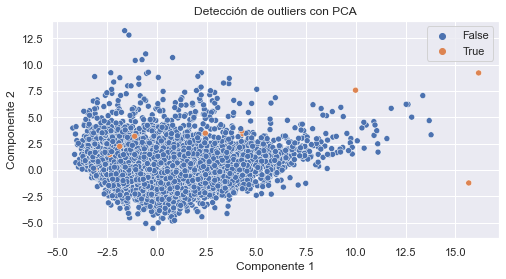

In [38]:
sns.scatterplot(dataPCA[:,0],dataPCA[:,1],hue=mark_outlier)
plt.title('Detección de outliers con PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

In [39]:
sumoutliers=np.sum(mark_outlier)
print("Total de outliers en la base de datos:", sumoutliers)

Total de outliers en la base de datos: 32


Como veniamos diciendo, los valores atipicos son los llamados outliers, en esta gráfica que tenemos de PCA, hemos querido representar en otro color los valores atipicos en nuestro dataset. Para elllo, hay que calcularlos antes creando una variable que se llama mark_outlier, donde se generan los atípicos y cuando es un dato normal lo marca como True y cuando es un outlier lo marca con False. Como vemos, en esta grafica, se muestran con la libreria sns.scatterplot. Para nuestro análisis, convendría quitar los valores que más afectan a nuestro dataset. El total de outliers que tenemos en el dataset de Airbnb es de 32 outliers. Aunque en la gráfica no salen tantos, esto se debe a que a veces se solapan, ya que en el gráfico solo se ven dos de todas las dimensiones que hay.

Los outliers se puede denominar también como Atípico, destacado, excepcional, anormal, valor extremo, valor anómalo y valor aberrante.

Es decir, que los outliers en nuestro dataset serán los valores que se escapan al rango en donde se concentran la mayoría de muestras. Las muestras que están distantes de otras observaciones.

Nos interesa detectar los Outliers por que pueden afectar considerablemente a los resultados que pueda obtener un modelo de Machine Learning. Para mal para bien. Por eso hay que detectarlos, y tenerlos en cuenta. Por ejemplo en Regresión Lineal ó algoritmos de Ensamble puede tener un impacto negativo en sus predicciones.

In [40]:
main_vars1ej=sorted([(abs(el), i) for i, el in enumerate(pca.components_[0])], reverse=True)
main_vars1ej[:3]

[(0.40014084588190857, 0), (0.34127287762208264, 41), (0.3398098210757817, 40)]

In [41]:
[X.columns[i] for n, i in main_vars1ej[:3]]

['Accommodates', 'Room_Type_2', 'Room_Type_1']

In [42]:
columns = ['pca_comp_%i' % i for i in range(43)]
data_pca  = pd.DataFrame(dataPCA, columns=columns, index=X.index)

In [43]:
data_pca['Price'] = data_final_norm['Price']

En los pasos anteriores hemos observado las variables que más explican el primer componente, en este caso hemos observado las tres principales características que se encuentran dentro del componente 1. Podemos ver que las principales características que se encuentran en el primer componente principal Accommodates (número de huéspedes) , Room_Type_2 (el tipo de habitación tipo 2) y Room_Type_1 (el tipo de habitación tipo 1). 

In [44]:
data_pca

pca_comp_0  pca_comp_1  pca_comp_2  pca_comp_3  pca_comp_4  pca_comp_5  \
40      -1.446789   -1.423825   -0.159606    2.249410   -3.603436   -0.156967   
41      -0.927595   -2.129059    0.712766    0.305052    0.309458   -0.146816   
42       0.599683   -1.100255    1.068277    0.939362    0.010002   -0.356243   
43      -2.208986   -0.213571    0.349130   -1.126367    0.010674    0.478885   
44       1.324597    0.070364    0.443924   -0.106669   -0.240003    0.245583   
...           ...         ...         ...         ...         ...         ...   
14753   -2.040767   -0.366061    0.687235    1.391490   -2.026531    0.134274   
14754   -0.680148   -0.877575    1.184131    0.713128    0.004826    0.303200   
14755    0.861725    2.149747   -2.715811    0.606894    1.164520    0.160813   
14756    2.478487    1.303502    0.686720    0.855537   -1.296587   -0.262489   
14757   -2.218743   -0.866268   -0.216666   -1.467943    0.066057    0.627374   

       pca_comp_6  pca_comp_7  pca_comp_8  pca_comp_9  ...  pca_comp_34  \
40       1.954742    1.850637   -0.275409   -0.253708  ...     0.115586   
41      -0.690117   -0.140979   -0.421266   -0.078173  ...    -0.545282   
42      -0.439679    0.287036    0.405772    0.269236  ...     0.173226   
43       0.593604   -0.144256    0.071443    0.082967  ...    -0.243545   
44      -0.320894   -0.885327   -0.332304   -0.053240  ...     0.690302   
...           ...         ...         ...         ...  ...          ...   
14753    1.353780    0.442960   -0.154830   -0.227952  ...     0.023490   
14754    0.140891   -0.395485   -0.498848   -0.184342  ...     0.228392   
14755   -0.325933   -1.026396   -0.508315   -3.241818  ...    -1.685316   
14756   -0.007041   -1.136004   -0.316879   -0.227895  ...    -0.247198   
14757    0.444019   -0.457760    0.119529    0.039141  ...    -0.174052   

       pca_comp_35  pca_comp_36  pca_comp_37  pca_comp_38  pca_comp_39  \
40        0.006869    -0.309410     0.198894     0.144828     0.079558   
41        0.135865    -0.074786     0.543497    -0.533629    -0.085120   
42        0.361267     0.311892    -0.322600    -0.989236    -0.260759   
43       -0.016632    -0.253922     0.468741     0.355225    -0.286617   
44       -0.942373     0.121179    -0.477287    -0.019020     0.033271   
...            ...          ...          ...          ...          ...   
14753    -0.033390    -0.056700    -0.887416     0.126735    -0.341429   
14754     0.191696     0.525736    -0.761094     0.555626    -0.433351   
14755    -1.503511     0.150630     0.370154    -1.675242     1.134932   
14756    -0.043724     0.172001    -0.640525     0.578603     0.211181   
14757     0.021704    -0.245813     0.393941     0.082359     0.125304   

       pca_comp_40   pca_comp_41   pca_comp_42     Price  
40       -0.145753 -2.143348e-14 -5.316889e-15 -0.677468  
41        0.063287  1.137950e-14 -9.085970e-15 -0.141636  
42        0.274720  7.419209e-16 -2.696022e-16  0.072697  
43        0.165742 -2.174673e-14 -3.867033e-15 -0.713190  
44       -0.570318 -1.705302e-15 -1.275180e-15  0.072697  
...            ...           ...           ...       ...  
14753    -0.169068 -3.976214e-16  1.259587e-17 -0.891801  
14754     0.188003 -1.423305e-16 -4.167288e-17 -0.552441  
14755    -0.482166  1.070350e-16 -3.173674e-16 -0.731051  
14756     0.050917 -7.114122e-16  5.715321e-17 -0.284525  
14757     0.142727 -5.494861e-17  1.019590e-17 -0.891801  

[13207 rows x 44 columns]

### 2. CONJUNTO DATOS: TRAIN & TEST

El aprendizaje automático supervisado consiste en crear modelos que asignen con precisión las entradas dadas (variables independientes o predictores) a las salidas dadas (variables dependientes o respuestas).

Para determinar si un modelo predictivo funciona, debemos probarlo con un conjunto de datos diferente. Para ello, todos los modelos predictivos dividen sus datos en dos partes: datos de entrenamiento (train) y datos de prueba (test). 

Utilizando train_test_split() de la biblioteca de ciencia de datos scikit-learn, puede dividir su conjunto de datos en subconjuntos que minimicen el potencial de sesgo en su proceso de evaluación y validación.

Lo más importante es entender que normalmente se necesita una evaluación no sesgada para utilizar correctamente estas medidas, evaluar el rendimiento predictivo de su modelo y validar el modelo.

Esto significa que no se puede evaluar el rendimiento predictivo de un modelo con los mismos datos que se utilizaron para el entrenamiento. Es necesario evaluar el modelo con datos nuevos que no hayan sido vistos por el modelo anteriormente. Esto se puede conseguir dividiendo el conjunto de datos antes de utilizarlo.

Los datos train son los que usamos para entrenar un modelo. Dependiendo de la calidad de los datos y de su ajuste al modelo, se va a determinar la calidad de el modelo. No obstante, no se pueden introducir los datos sin antes realizar una limpieza de los mismos. Esta labor de limpieza es la que más tiempo consume, siendo esencial realizarla. 

En cambio, los datos test son aquellos que son reservados para comprobar si el modelo; que hemos generado anteriormente con los datos train, funciona. Este conjunto de datos test tiene que tener un tamaño significativo, ya que, por el contrario, si no es significativo, la predicción no será realizada con exactitud. 

Por lo que el conjunto de entrenamiento (train) se aplica para entrenar, o ajustar, su modelo. El conjunto de validación (validation) se utiliza para la evaluación insesgada del modelo durante el ajuste de los hiperparámetros.Y el conjunto de prueba (test) es necesario para una evaluación insesgada del modelo final. No debería utilizarlo para el ajuste o la validación.

Por lo general, del conjunto de datos, un 70% de los datos son clasificados como train y un 30% como test. Se podrá variar según convenga al conjunto de datos, siendo siempre conscientes de que hay que evitar el sobre ajuste o ‘overfitting’. 

In [45]:
train, test = train_test_split(data_pca, test_size = 0.3, 
                                         random_state = 100)

In [46]:
X_train= train.drop(columns=['Price'])
y_train = train['Price']
X_test= test.drop(columns=['Price'])
y_test = test['Price']

### 3. MODELOS DE REGRESION:

Para este analisis predictivo, vamos a comparar tres modelos que hemos estudiado durante este curso de modelos supervisados de tipo regresion. 

##### A) RANDOM FOREST:

Comenzaremos con uno de los embsambladores más importantes y más usados, Random forest.

Es uno de los embsamblados de bagging. Se crearán N árboles con N conjunto de muestras aleatorias del Dataset, y en cada nodo de decisión de cada árbol, se elegirá solo entre un subconjunto de K features o variables tomadas de forma aleatorías de entre todo el conjunto de features. Estos datos son muy estables.

Aunque los árboles de decisión son fáciles de interpretar, tienen una alta varianza. Si cogemos datos distintos los resultados son muy diferentes y hay riesgo de sobreajuste. Por ello, la mejor solución es hacer varios árboles y combinar sus resultados. Es decir, hacer un ensemble, concretamente, un random forest. Las ventajas que tiene este algoritmo, entre otras, son el trato de grandes volúmenes de datos y la efectividad a la hora de estimar datos faltantes y mantener la precisión cuando falta una gran proporción de datos. 
Mediante esta técnica, ningún árbol ve todos los datos de entrenamiento (train). Cada uno de ellos se entrena con distintas muestras de datos para resolver el mismo problema. Se combinan resultados y se compensan errores, teniendo una predicción que generaliza mejor. Para los problemas de regresión, como el nuestro, la forma más común de combinar resultados es tomando su media aritmética. 
Cuantos más árboles tengamos, más robusto será el bosque y más precisa será nuestra predicción. 

Todos los modelos de aprendizaje estadístico y machine learning sufren el problema de equilibrio entre bias y varianza. Los métodos de ensemble combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. seencuentran o tipos:

Los parámetros que destacan aquellos que detienen el crecimiento de los árboles, los que controlan el número de árboles y predictores incluidos, y los que gestionan la paralelización:

--> n_estimators: número de árboles incluidos en el modelo.

--> max_depth: profundidad máxima que pueden alcanzar los árboles.

--> min_samples_split: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. 

--> min_samples_leaf: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. 

--> max_leaf_nodes: número máximo de nodos terminales que pueden tener los árboles.

--> max_features: número de predictores considerados a en cada división. 

--> oob_score: Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.

--> n_jobs: número de cores empleados para el entrenamiento. En random forest los árboles se ajustan de forma independiente, por lo la paralelización reduce notablemente el tiempo de entrenamiento. Con -1 se utilizan todos los cores disponibles.

--> random_state: semilla para que los resultados sean reproducibles.


- Ajuste del modelo

La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. A continuación, se ajusta un árbol de regresión empleando como variable respuesta Price y como predictores todas las otras variables disponibles. El modelo inicial se ha entrenado manteniendo los hiperparámetros con su valor por defecto, excepto max_depth=3 . Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.

In [47]:
forest = RandomForestRegressor(
            max_depth         = 3,
            random_state      = 100
          )

In [48]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=100)

- Importancia de la característica obteniendo los componentes del PCA

La importancia de las características es una puntuación asignada a las características de un modelo de aprendizaje automático que define lo importante que es una característica para la predicción del modelo. Puede ayudar en la selección de características y podemos obtener información muy útil sobre nuestros datos. La importancia de la característica se refiere a las técnicas que asignan una puntuación a las características de entrada en función de su utilidad para predecir una variable objetivo.

La importancia de las características se refiere a una clase de técnicas para asignar puntuaciones a las características de entrada a un modelo predictivo que indica la importancia relativa de cada característica al realizar una predicción. Los puntajes de importancia de las características se pueden calcular para problemas que involucran la predicción de un valor numérico, llamado regresión. Los puntajes son útiles y se pueden usar en una variedad de situaciones en un problema de modelado predictivo, como: comprender mejor los datos, entender mejor un modelo y reducir el número de funciones de entrada.


En el siguiente paso, vamos a estudiar cuales son las variables que más aportan a nuestro conjunto de datos. para ello, es necesario utilizar feature importances. Tras haber hecho un PCA, nuestras features van a ser los componentes, por ello, también realizaremos una transformacion para ver que variables son las que mas aportan a nuestro dataset. Podemos ver que los tres componentes principales que se califican como las variables más importantes respecto a la predición del modelo son el componente 0, 3 y 34. A simple vista no podemos decir que variables se encuentran dentro de cada componente, por ello mediante el orden de las variables que se encuentran en cada componente, seleccionamos las tres primeras variables que más explican la varianza del componente. Podemos ver que en el componente cero se encuentran las variables Acomodados, tipo de habitación 2 y el tipo de habitación 1. También es interesante observar las variables que más explican el componente 3 las cuales son el número de reviews, reviews por mes y el tipo de propiedad 1. Por último, observamos las variables que más explicar el componente 34, indentificado como el tercer feature más importante para la predicción del modelo, en el cual se encuentran las variables tasa de limpieza, deposito de seguridad y el Host_Listings_Count. Podríamos decir que estás variables se encuentran entre las más importantes para la predicción del modelo Random Forest que estamos empeando en este apartado. 

In [49]:
features = [(a,b) for a,b in zip(X_train.columns, forest.feature_importances_)]

In [50]:
features = sorted(features, key= lambda c:c[1], reverse=True)

In [51]:
fig = px.bar(x=[a for a,b in features], y=[b for a,b in features])
fig.show()

Aqui, observamos que las componentes que mas aportan a nuestro conjunto de datos son las componentes  [0], [3], [34]. Y para tener un mejor analisis de que variables son las que mas aportan a cada componente hay que seguir los siguientes pasos:

In [52]:
main_vars1ej=sorted([(abs(el), i) for i, el in enumerate(pca.components_[0])], reverse=True)
main_vars1ej[:3]

[(0.40014084588190857, 0), (0.34127287762208264, 41), (0.3398098210757817, 40)]

In [53]:
[X.columns[i] for n, i in main_vars1ej[:3]]

['Accommodates', 'Room_Type_2', 'Room_Type_1']

In [54]:
main_vars1ej=sorted([(abs(el), i) for i, el in enumerate(pca.components_[3])], reverse=True)
main_vars1ej[:3]

[(0.40809790558456743, 7), (0.3600084953170762, 9), (0.34314416132829956, 18)]

In [55]:
[X.columns[i] for n, i in main_vars1ej[:3]]

['Number_of_Reviews', 'Reviews_per_Month', 'Property_Type_1']

In [56]:
main_vars1ej=sorted([(abs(el), i) for i, el in enumerate(pca.components_[34])], reverse=True)
main_vars1ej[:3]

[(0.6088448345855028, 14), (0.4212746869825653, 15), (0.36014898234705245, 13)]

In [57]:
[X.columns[i] for n, i in main_vars1ej[:3]]

['Cleaning_Fee', 'Security_Deposit', 'Host_Listings_Count']

Las variables que mas aportan a la componente:

0: ['Accommodates', 'Room_Type_2', 'Room_Type_1']

3: ['Number_of_Reviews', 'Reviews_per_Month', 'Property_Type_1']

34: ['Cleaning_Fee', 'Security_Deposit', 'Host_Listings_Count']


- Podado del árbol mediante pruning


Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. El proceso de pruning intenta encontrar el árbol más sencillo (menor tamaño) que consigue los mejores resultados de predicción.

Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante. Dado que no hay forma de conocer de antemano el valor óptimo de ccp_alpha, se recurre a validación cruzada para identificarlo.

Aunque existen otras formas de indentificar árboles "optimos", por ejemplo identificando el valor de max_depth y min_samples_split mediante validación cruzada, el pruning puede generar mejores resultados ya que permite que una división poco útil se mantenga si las siguientes divisiones que parten de ella sí lo son.

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, como hemos hecho,  este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

- Validación cruzada

En el próximo paso, descargaremos las librerias de gridsearch. Esta es una forma de validacion cruzada. Es una técnica para evaluar modelos de machine learning mediante el entrenamiento de varios modelos en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementario de los datos. Por ello, pondremos diferentes hiperparametros en el estimador con varios subconjuntos, y el programa nos dirá que parametros son los que mejor estiman nuestro modelo. Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros.

Los parametros son del GridSearchCV :

- estimator: el modelo que se ha de evaluar

- param_grid: un diccionario en que se indicar los parámetros a evaluar como clave y el conjunto elementos como valor

- cv: el número de conjuntos en los que se divide los datos para la validación cruzada.


In [58]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

In [60]:
grid = GridSearchCV(
        estimator = RandomForestRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 100
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )


In [61]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=100),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

Para terminar, podemos obtener cual es el mejor parametro del modelo a traves de best_params_. En este caso, seria 0.0 la mejor opción entre los valores que hemos evaluado.

In [62]:
grid.best_params_

{'ccp_alpha': 0.0}

In [63]:
modelo_final = grid.best_estimator_


- Predición y evaluación del modelo

A continuacón, se evalúa la capacidad predictiva del primer árbol el que en este caso conocemos como fores y del árbol final que se llama en este caso modelo_final empleando el conjunto de test.

El RMSE es una métrica de regresión del aprendizaje automático, error cuadrátrico medio. Este es la raiz del MSE. La raiz se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos. El RMSE ordena el modelo de la misma manera que el MSE, por ejemplo siempre que el MSE de un modelo sea mayor que el de otro modelo el RSME será igual, es decir, el modelo que tenía mayor MSE también tendrá mayor RSME. MSE básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores.Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.
Raíz del error cuadrático medio (RMSE): mide la diferencia entre dos conjuntos de datos (en este caso el precio real y el precio predecido. Cuánto menor sea la diferencia, más cercanos estarán los valores predecidos a los reales, y consecuentemente, más preciso será el modelo en las predicciones. RMSE (root mean square error) nos da la diferencia entre los resultados reales y nuestros resultados calculados del modelo. Define la calidad de nuestro modelo (que usa datos cuantitativos), qué tan preciso ha predicho nuestro modelo o el porcentaje de error en nuestro modelo. RMSE es uno de los métodos para evaluar modelos de aprendizaje automático supervisado. Cuanto mayor sea el RMSE será la inexactitud de nuestro modelo y viceversa.

Podemos observar cómo el proceso de pruning consigue reducir el error rmse, en el primer árbol del modelo el rsme es 0.6868 y el rsme del modelo final es 0.64. Consideramos que hemos obtenido un valor de RSME bastante bueno porque está muy cerca de cero, y además aplicando el proceso pruning nuestro modelo ha mejorado. 


Además, hemos obtenido la puntuación del modelo en train y test. Podemos ver que para el modelo de forest está puntuación es menor comparada con la puntación del modelo final. Siendo en el modelo forest una puntación de 0.534 para train en comparación de 0.916 en el modelo final y una puntación de 0.503 para test siendo la puntación de test en el modelo final de 0.564. Podemos ver como la puntación del modelo final es mayor a la del primer modelo, por lo que podemos afirmar que el modelo ha mejorado. 


La puntuación R2 es una métrica muy importante que se utiliza para evaluar el rendimiento de un modelo de aprendizaje automático basado en la regresión. Se nombra como R al cuadrado y también se conoce como coeficiente de determinación. Funciona midiendo la cantidad de varianza en las predicciones explicadas por el conjunto de datos. En otras palabras, es la diferencia entre las muestras del conjunto de datos y las predicciones realizadas por el modelo.

En el código siguiente, primero habiamos entrenado un modelo de aprendizaje automático utilizando el algoritmo de random forest de regresión y luego hemos calculado también su puntuación r al cuadrado. La puntuación R2 del modelo entrenado aquí es de 0,52, lo que no está mal. Si el valor de la puntuación r al cuadrado es 1, significa que el modelo es perfecto y si su valor es 0, significa que el modelo funcionará mal en un conjunto de datos no visto. Esto también implica que cuanto más se acerque el valor de la puntuación r al cuadrado a 1, más perfecto es el modelo entrenado. Por lo que podemos concluir, que el modelo mejora después de realizar el GridSearchCV ya que el valor del coeficiente de determinación del modelo final es de 0.5639 por lo que se ha acercado mñas al valor 1.




In [64]:
predicciones = forest.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.686809825243642


In [65]:
from sklearn.metrics import r2_score

In [66]:
print(r2_score(y_test,predicciones))

0.502523976598266


In [67]:
predicciones1 = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones1,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.6430157714992146


In [68]:
print(r2_score(y_test,predicciones1))

0.563943860392472


In [69]:
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))



forest train score 0.534, forest test score: 0.503


In [70]:
print('\n\nforest con validacion cruzada train score %.3f, forest con validacion cruzada test score: %.3f' % (
modelo_final.score(X_train,y_train),
modelo_final.score(X_test, y_test)))



forest con validacion cruzada train score 0.916, forest con validacion cruzada test score: 0.564


In [71]:
rmse_forest = mean_squared_error(y_test, forest.predict(X_test), squared=False)
rmse_forest

0.686809825243642

In [72]:
rmse_forest_validacion_cruzada = mean_squared_error(y_test, modelo_final.predict(X_test), squared=False)
rmse_forest_validacion_cruzada

0.6430157714992146

##### B) SUPPORT VECTOR MACHINE 

El SVR (Support Vector Regression) o Regresión de Vectores de Soporte es un algoritmo de regresión basado en los mismos algoritmos que usan las Máquinas de Vectores de Soporte o, SVM, para la creación de modelos de clasificación. Se puede emplear tanto para regresiones lineales o como para no lineales. La idea que subyace detrás de SVM, es la de buscar un hiperplano que optimice la separación entre un conjunto de datos con dos clases linealmente separables.

Los conceptos fundamentales en SVM son:

• Hiper-plano: Plano que marca la frontera de decisión entre diferentes clases de un conjunto de datos

• Vectores de soporte. Son los puntos del conjunto de datos que están más cerca del hiperplano.

• Margen es el gap de separación formada por las líneas más cercanas a los vectores de soporte.

El objetivo de una máquina de soporte vector es encontrar el hiperplano que tenga el mayor margen de separación entre sus vectores de soporte.
Esta maximización es transformada en un problema de optimización utilizando técnicas estándar de programación cuadrática para su resolución. SVM busca la separación óptima. En esta optimización, se suelen relajar algunas de sus restricciones para que no tenga en cuenta como vectores soportes algunos outliers, y así hacer el modelo más robusto. 

Para definir el algoritmo lo primero que hacemos es importar SVR desde el modulo sklearn punto svm. Una vez realizado esto podemos proceder a definir el algoritmo que lo vamos a llamar svmodel. Aunque sabemos que para regresión el mejor método es método sklearn.svm.SVR. Hemos decidido realizar también el método sklearn.svm.LinearSVC y compararlos. 

El método línear podemos ver que tiene un RMSE con un valor de 0.69699 y un coeficiente de determinación de 0.487. A continuación representamos un scatter plot en el que se relacionan los precios actuales y los predecidos. La diagonal negra representa el modelo perfecto, ya que significaría que los precios predecidos son exactamente los actuales, por lo que los estaría calculando exactos. Podemos ver que en este caso el modelo no es tan perfecto porque vemos como algunos valores precedicidos por ejemplo 0 son actualmente 4,1 o 7,8 aproximadamente. 

Por otro lado, hemos precedido los parámetros óptimos para SVR del modelo en el dataframe hyper_df tenemos los parámetros óptimos en orden ascendente. Por lo que el parámetro óptimo para el modelo es C=10, epsilon=0.1. Donde C es el parámetro regulación y es la cota superior al número de errores que en este caso es 10. Podemos ver que las cuotas que aparecen como posibles hiperparámetros están entre 0.1 y 1000, por lo que podemos decir que en este caso el valor de C no es muy elevada, por lo que da lugar a un margen más ancho, menos peso a los errores y es un modelo de baja complejidad. El RMSE es 0.6189 y un R2 de 0.5959, podemos ver que el es mejor podelo para pedecir ya que el valor de RMSE es menor que en el SVlinear y el R2 es mayor por lo que está más cerca de 1 ( valor óptimo). En el gráfico de correlación, podemos ver que los valores se encuentran más cerca de la diagonal de la 'perfeccion' del modelo, por lo que podemos concluir que el modelo SVR es mejor que el linear en este caso. Ya que los valores predecidos son más cercanos a los actuales, que en el modelo linear. 



In [73]:
svmodel = LinearSVR(max_iter =1000000)
svmodel.fit(X_train, y_train)

LinearSVR(max_iter=1000000)

In [74]:
Y_pred = svmodel.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
r2 = svmodel.score(X_test, y_test)

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 0.6969986786150598
R2 score is 0.48765433630434074




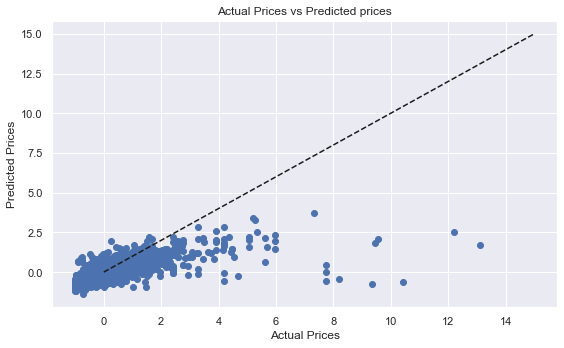

In [75]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, Y_pred);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [76]:
C_arr=[0.1,1,10,100,1000]
eps_arr=[1,0.1,0.01,0.001,0.0001,0.00001]

In [ ]:
hyper_arr=[]
hyper_cols=["c","epsilon","correlation"]
for C in C_arr:
    for epsilon in eps_arr:
        model=SVR(kernel="rbf",C=C,epsilon=epsilon)
        svr=model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        corr=stats.pearsonr(y_test,y_pred)[0]
        hyper_arr.append([C,epsilon,corr])

In [78]:
hyper_df= pd.DataFrame(hyper_arr,columns=hyper_cols)
hyper_df=hyper_df.sort_values(by=["correlation"],ascending=False)
hyper_df

c  epsilon  correlation
13    10.0  0.10000     0.772927
17    10.0  0.00001     0.771816
16    10.0  0.00010     0.771814
15    10.0  0.00100     0.771796
14    10.0  0.01000     0.771736
7      1.0  0.10000     0.762976
10     1.0  0.00010     0.762208
11     1.0  0.00001     0.762201
9      1.0  0.00100     0.762196
8      1.0  0.01000     0.762192
6      1.0  1.00000     0.748630
19   100.0  0.10000     0.745091
20   100.0  0.01000     0.740725
21   100.0  0.00100     0.739869
22   100.0  0.00010     0.739794
23   100.0  0.00001     0.739781
12    10.0  1.00000     0.734728
1      0.1  0.10000     0.706412
2      0.1  0.01000     0.706082
3      0.1  0.00100     0.705897
4      0.1  0.00010     0.705874
5      0.1  0.00001     0.705871
0      0.1  1.00000     0.693515
18   100.0  1.00000     0.672282
25  1000.0  0.10000     0.656709
26  1000.0  0.01000     0.646253
27  1000.0  0.00100     0.644344
28  1000.0  0.00010     0.644189
29  1000.0  0.00001     0.644182
24  1000.0  1.00000     0.551389

In [79]:
svmodel = SVR(kernel="rbf",C=10, epsilon=0.1, max_iter =1000000)
svmodel.fit(X_train, y_train)

SVR(C=10, max_iter=1000000)

In [80]:
Y_pred = svmodel.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
r2 = svmodel.score(X_test, y_test)

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 0.6189890161145226
R2 score is 0.5959221539287822




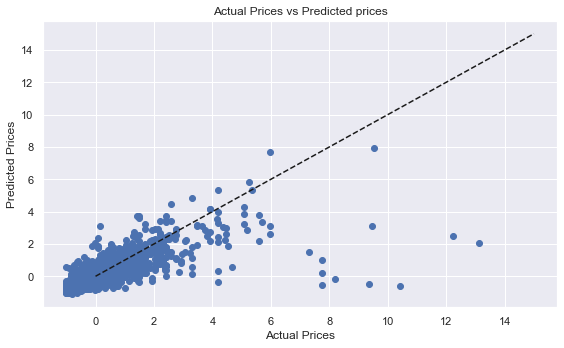

In [81]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, Y_pred);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

##### C) REDES NEURONALES

El tercer modelo que vamos a utilizar en este analisis de regresion, son las redes neuronales. La inteligencia artificial como modelo tenemos las redes neuronales artificiales, estas están teniendo en los últimos años un gran desarrollo e impacto en diversas áreas del conocimiento. El alcance de las funciones de las redes neuronales es muy amplio, debido a su funcionamiento, son capaces de aproximar cualquier función existente con el suficiente entrenamiento. Principalmente las redes neuronales son utilizadas para analisis de predicción y clasificación. Deep learning es uno de los principales subcampos del marco del aprendizaje automático. El aprendizaje automático es el estudio del diseño de algoritmos, inspirado en el modelo del cerebro humano.

Las conexiones de la red se inicializan aleatoriamente y de forma progresiva se autoajustan a medida que se entrena con los datos disponibles (train), de manera que ésta aprende a reconocer todos los casos del conjunto de datos utilizados para su entrenamiento. El training termina cuando, después de un número variable de iteraciones, se consigue clasificar correctamente el total de los casos, o se llega a alcanzar un valor máximo de aciertos, que no aumenta con más iteraciones. De esta manera, conseguimos que la red aprenda a reconocer patrones con todo tipo de formas y asi, mejora su potencial clasificador. 


El proceso de entrenamiento de una red neuronal consiste en ajustar el valor de los pesos y bías de tal forma que, las predicciones que se generen, tengan el menor error possible. Siendo asi, el modelo es capaz de identificar qué predictores tienen mayor influencia y estando relacionados entre ellos y con la variable Precio, siendo la variable respuesta. A la hora de entrenar este tipo de modelos es necesario realizar dos tipos de transformaciones de los datos: One hot encoding y standarizacion.


- LIBRERIAS 


Deep learning está soportado por varias bibliotecas como Theano, TensorFlow, Keras, esta ultima es una de las bibliotecas de python más potentes y fáciles de usar, que está construida sobre bibliotecas de aprendizaje profundo populares como TensorFlow. TensorFlow es la biblioteca matemática simbólica más famosa utilizada para crear redes neuronales y modelos de aprendizaje profundo. TensorFlow es muy flexible y su principal ventaja es la computación distribuida. Keras se basa en una estructura mínima que proporciona una forma limpia y fácil de crear modelos de aprendizaje profundo basados en TensorFlow o Theano. Keras está diseñado para definir rápidamente modelos de aprendizaje profundo, siendo una opción óptima.

Esta biblioteca aprovecha varias técnicas de optimización para hacer que la aplicacion de redes neuronales de alto nivel sea más fácil y tenga más rendimiento.

- PASOS 

1.	Compilar el modelo - se puede utilizar para aprender por la formación y, finalmente, hacer a la predicción. La función de loss y el optimizador se utilizan en la fase de aprendizaje para encontrar el error y hacer la optimización para que el error se minimice. (modelo.compile)

2.	Ajustar el modelo - El proceso de aprendizaje real se realizará en esta fase utilizando el conjunto de datos de entrenamiento. (modelo.fit)

3.	Predecir el resultado para un valor desconocido - Predecir la salida para los datos de entrada desconocidos (modelo.predict)

4.	Evaluar el modelo - Evaluar el modelo prediciendo la salida para los datos de prueba y comparando la predicción con el resultado real de los datos de prueba. (modelo.evaluate)



La red neuronal esta compuesta de cinco layers; cuatro ocultas y el output. Se usara reLu para las tres primeras y linear para el output, al querer como respuesta una regression.

Usaremos SGD como optimizer, Mean SquaredError para definer la function Loss

Podemos apreciar los parametros de cada una de las layers; apreciando que el ‘dense_4’ tiene solo 2 para proporcionar una regres{on lineal

Entrenaremos el modelo con X_train y y_train, con 100 epochs, un batch size de 256. Adicionalmente hemos querido divider otra vez el data para poder tener un ‘validation_split’, el cual usaremos posteriormente.

Imprimimos los resultados de las funciones Loss de el training set y el validation set para ver el resultado final de calidad del modelo. En el resultado podemos apreciar una subida del Loss en el validation al igual que en r2. Lo que sugiere que el model sufre de overfitting, sufriendo un alto Bias y y varianza.

Como vemos este ultimo método nos da mejores resultados en training tanto en MSE como en r2. Como hemos comentado anteriormente, para ver si un modelo es bueno, hay que fijarse en estas métricas. El error cuadratico medio en entrenamiento nos da un resultado de 0.34 y un R2 de 0.66, es decir que hay es de 66% la variación de la variable de respuesta que explica la relación con el precio. Y 34% es la cantidad de error que hay entre Y_train e Y_train_pred. En cambio, para test, los datos no se ajustan tanto al modelo. Tiene un 52% de error entre Y_test e Y_test_pred, y tiene un 42% , que explica al variabilidad del modelo.  Por ultimo, tenemos model.evaluate, nos da los valores de las métricas que hemos calculado para train, pues este caso es para los datos test.

In [84]:
import tensorflow as tf

In [85]:
inputs = tf.keras.Input(shape=(X_train.shape[1]))

x = tf.keras.layers.Dense(128, activation="relu")(inputs)
x = tf.keras.layers.Dense(254, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(1, activation="linear")(x)


output = tf.keras.layers.Dense(1)(x)


model = tf.keras.Model(inputs, output)

In [86]:
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])

In [87]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense (Dense)               (None, 128)               5632      
                                                                 
 dense_1 (Dense)             (None, 254)               32766     
                                                                 
 dense_2 (Dense)             (None, 64)                16320     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 54,785
Trainable params: 54,785
Non-trainable p

- CAPAS:

La forma más común de representar la estructura de una red neuronal es mediante el uso de capas (layers), formadas a su vez por neurona. A su vez, cada neurona, realiza una operación sencilla y está conectada a las neuronas de la capa anterior y de la capa siguiente mediante pesos, cuya función es regular la información que se propaga de una neurona a otra. En nuestro ejemplo, vamos a sacar 4 layers.
La primera capa de la red neuronal se conoce como capa de entrada o input layer y recibe los datos en bruto, es decir, el valor de los predictores. La capa intermedia, conocida como capa oculta o hidden layer, recibe los valores la capa de entrada, ponderados por los pesos. La última capa, llamada output layer, combina los valores que salen de la capa intermedia para generar la predicción. Cada neurona de la capa de entrada representa el valor de uno de los predictores.

- HIPERPARAMETROS

Como ya hemos visto en los mdoelos anteriores, los hiperparametros nos ayudan a tener un mejor analisis y a una mejor predicciond el modelo. Las redes a veces generan modelos que aprenden relaciones muy complejas, sin embargo, sufren fácilmente el problema de sobreajuste lo que los incapacita al tratar de prdecir nuevas observaciones. La forma de minimizar este problema es con los hiperparametros. Entre otros encontramos, learning rate que establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza. Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros.

- FUNCIONES

model.layers - Devuelve todas las capas del modelo en forma de lista

model.inputs - Devuelve todos los datos de entrada del modelo en forma de lista.

model.outputs - Devuelve todos los datos de salida del modelo en forma de lista

model.summary()- proporciona un método simple, summary para obtener la información completa sobre el modelo y sus capas

epochs - número de veces que se necesita evaluar el modelo durante el entrenamiento.

batch_size - instancias de entrenamiento. 


Existe tambien una gran cantidad de funciones integradas relacionadas con las redes neuronales para crear adecuadamente el modelo y las capas de Keras. Entre otras estan las funciones de activacion, de loss, de optimizacion y regularizadores.


In [89]:
import time as time

In [90]:
_start = time.time()

_history = model.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

_end = time.time()

print(f"Time taken to run: {round((_end - _start)/60,1)} minutes")

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 0.7223 - mean_squared_error: 0.7223 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5651 - mean_squared_error: 0.5651 - val_loss: 0.4558 - val_mean_squared_error: 0.4558
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5423 - mean_squared_error: 0.5423 - val_loss: 0.4406 - val_mean_squared_error: 0.4406
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4852 - mean_squared_error: 0.4852 - val_loss: 0.4363 - val_mean_squared_error: 0.4363
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4550 - mean_squared_error: 0.4550 - val_loss: 0.4216 - val_mean_squared_error: 0.4216
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4393 - mean_squared_error: 0.4393 - val_loss: 0.4171 - val_mean_squared_error: 0.4171
Epoch 7/100
33/33 [==============

33/33 [==============================] - 0s 3ms/step - loss: 0.3273 - mean_squared_error: 0.3273 - val_loss: 0.3925 - val_mean_squared_error: 0.3925
Epoch 52/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3276 - mean_squared_error: 0.3276 - val_loss: 0.3933 - val_mean_squared_error: 0.3933
Epoch 53/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3278 - mean_squared_error: 0.3278 - val_loss: 0.3927 - val_mean_squared_error: 0.3927
Epoch 54/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3279 - mean_squared_error: 0.3279 - val_loss: 0.3997 - val_mean_squared_error: 0.3997
Epoch 55/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3336 - mean_squared_error: 0.3336 - val_loss: 0.3921 - val_mean_squared_error: 0.3921
Epoch 56/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3225 - mean_squared_error: 0.3225 - val_loss: 0.3869 - val_mean_squared_error: 0.3869
Epoch 57/100
33/33 [=====================

In [93]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Test MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Test r2:", round(r2_score(y_test, y_test_pred),4))

289/289 [==============================] - 0s 1ms/step
Training MSE: 0.3409
Test MSE: 0.5229

Training r2: 0.6663
Test r2: 0.4485


In [94]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test MSE:', score[1])

Test loss: 0.5229046940803528
Test MSE: 0.5229046940803528


## CONCLUSIÓN

Para concluir este proyecto, hemos elaborado un análisis exploratorio de los datos. En el mismo, hemos seleccionado algunas de las características que hemos considerado importantes para el desarollo de este modelo de regresión. Entre las distintas variables, las más importantes han sido Accommodates y Room Type, que son las que más definen el modelo. Respecto a la variable ciudad y país (country y city), al encontrarse la mayoría de datos en Madrid, hemos filtrado únicamente por la misma y hemos eliminado la variable país. Hemos tratado los distintos tipos de datos que incluía el dataset de Airbnb, convirtiendo en númericas aquellas variables que eran de carácter categórico. Además, hemos hecho uso de un PCA para poder observar los outliers que se encuentran dentro de este dataset, ya que la mayoría de las veces es importante tenerlos en mente. A partir de los datos obtenidos en el Principal Component Analysis, hemos desarollado el dataset empleado en los distintos modelos de regresión. Hemos encontrado oportuno la comparación entre los modelos Random Forest Regressor, Support Vector Regression y Redes Neuronales. 

En el primer modelo, Random Forest Regressor, llamado forest, hemos obtenido un SMSE de 0.6868 y un R2 de 0.5025. En cambio, en el modelo final hemos conseguido mejorar este modelo obteniendo un RMSE de 0.643 y un R2 de 0.563, por lo que este modelo ha disminuido el RMSE y ha aumentado el R2. En segundo lugar, el modelo de linear SVR tiene un RMSE de 0.69 y un R2 de 0.563 y, por otro lugar, el SVR tiene un RMSE 0.618 y un R2 de 0.5959, por lo que se puede decir que el modelo SVR es mejor que el linear en este modelo de regresión. Por último, en redes neuronales hemos obtenido un RMSE en training de 0.34 y en test de 0.5229, y , por otro lado, el R2 en training de 0.666 y un R2 en test de 0.4485. 

Nos gustaría recalcar que el modelo más rápido de ejecutar de todos es el de redes neuronales. Este tarda menos de un minuto, seguido por el de random forest y por el modelo SVR, que han   que han llegado a tardar 2h y 4h, respectivamente.  

Existen determinadas métricas que podemos utilizar para seleccionar el mejor modelo de entre un conjunto de ellos con distintos predictores o número de ellos. Por ejemplo, el residual sum of squares RSS y R2 no serían adecuados para seleccionar modelos con distinto número de predictores, ya que el training error tiende a decrecer conforme se incluyen más variables en el modelo. Debemos seleccionar el mejor modelo en base al test error, que debe ser estimado. 
Basandonos en la Raíz del Error Cuadrático Medio de test en cada modelo pero teniendo en cuenta que hay posibilidad de overfitting en redes neuronales, podemos decir que el modelo que mejor se ajusta a este problema de regresion es el SVR, ya que su RMSE es 0.618. Comparado con el RMSE de Random Forest Regressor de 0.64 y aún sabiendo que el RMSE de redes neuronales es 0.5224, pero hay mucha diferencia entre test y train por lo que esto se debe al overfitting. 

Para concluir, los metodos de machine learning han sido un gran avance en estos ultimos años, ya que podemos predecir los precios de las viviendas a traves de metodos como los que hemos ido comentando durante el trabajo.
